data source: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

# preparing data

In [ ]:
import os

def rename_files_and_change_format(folder_path):
    folders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]

    for folder in folders:
        folder_path_full = os.path.join(folder_path, folder)
        files = [f for f in os.listdir(folder_path_full) if f.lower().endswith('.jpg')]

        for idx, file_name in enumerate(files, start=1):
            old_file_path = os.path.join(folder_path_full, file_name)

            # normalize filenames
            new_file_name = str(idx) + '.jpeg'
            new_file_path = os.path.join(folder_path_full, new_file_name)

            os.rename(old_file_path, new_file_path)
            print(f'Renamed: {old_file_path} -> {new_file_path}')

if __name__ == "__main__":
    folder_path = "C:\Users\Asus\brain_tumor_classification\brain_tumor_dataset"  
    rename_files_and_change_format(folder_path)

Text(0.5, 1.0, 'Tumor')

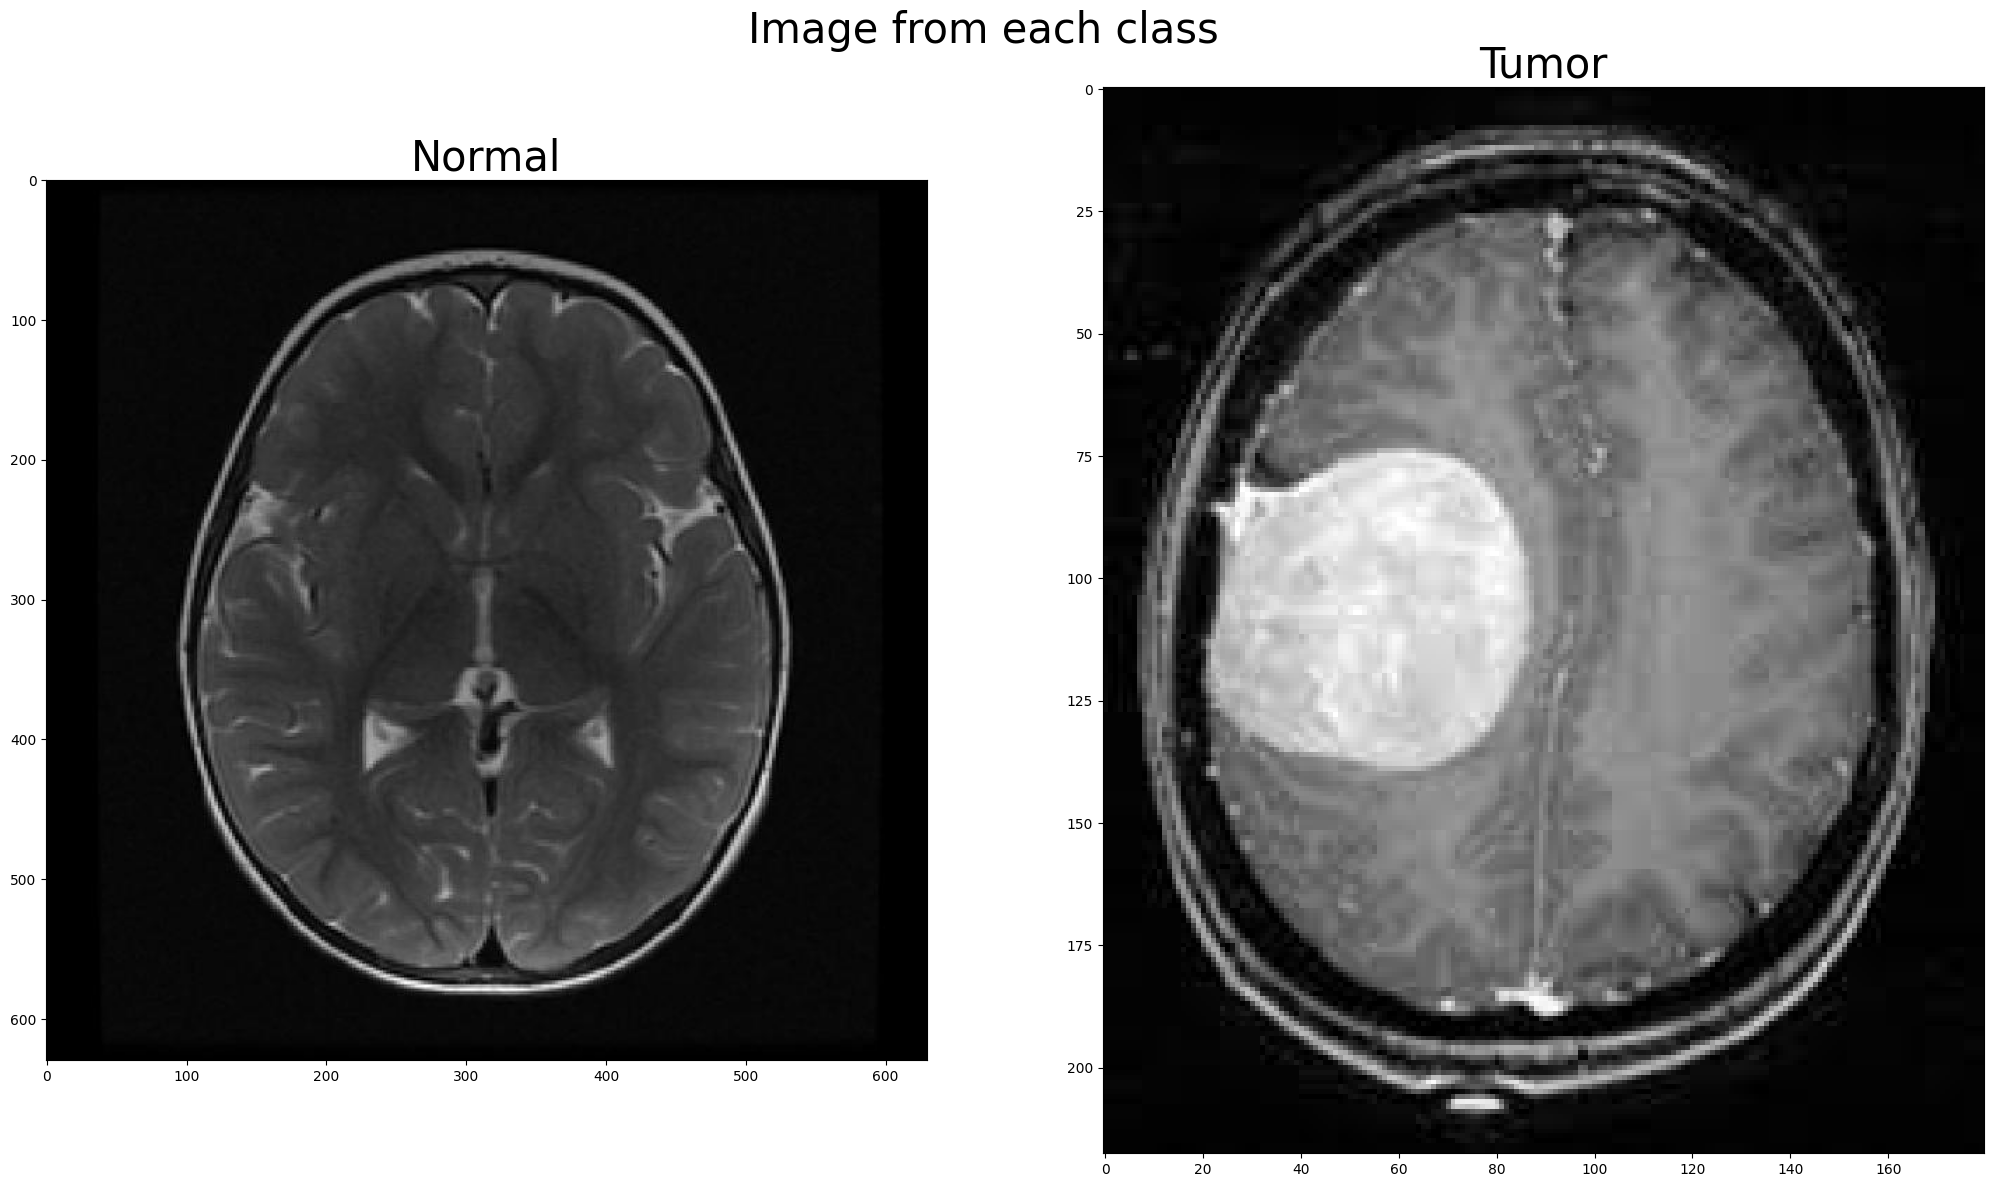

In [32]:
import random
import cv2
import matplotlib.pyplot as plt
import os

fig, axs = plt.subplots(1, 2, figsize=(25,20))
axs = axs.ravel().tolist()

class_names=['tumor', 'normal']
train_split_images_path = []

instance_normal = r'C:\Users\Asus\brain_tumor_classification\brain_tumor_dataset\train\normal\1.jpeg'
instance_tumor = r'C:\Users\Asus\brain_tumor_classification\brain_tumor_dataset\train\tumor\1.jpeg'

#display normal and tumor images
img_normal = cv2.imread(instance_normal)
img_normal = cv2.cvtColor(img_normal, cv2.COLOR_BGR2RGB)

img_tumor = cv2.imread(instance_tumor)
img_tumor = cv2.cvtColor(img_tumor, cv2.COLOR_BGR2RGB)

fig.suptitle("Image from each class", y=0.8, fontsize=30)
axs[0].imshow(img_normal)
axs[0].set_title('Normal', fontsize = 30)
axs[1].imshow(img_tumor)
axs[1].set_title('Tumor', fontsize = 30)


# create custom deeplake dataset

In [1]:
import deeplake
import os

os.environ['ACTIVELOOP_TOKEN']='*******' # input your token here

c:\Users\Asus\anaconda3\envs\brain-tumor\Lib\site-packages\deeplake\util\check_latest_version.py:32: UserWarning: A newer version of deeplake (3.8.18) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(


In [3]:
# Create the dataset
ds_train = deeplake.dataset('hub://hasanah/brain_tumor_train')
ds_val = deeplake.dataset('hub://hasanah/brain_tumor_val')
ds_test = deeplake.dataset('hub://hasanah/brain_tumor_test')

\

Your Deep Lake dataset has been successfully created!



/

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/hasanah/brain_tumor_train



\

hub://hasanah/brain_tumor_train loaded successfully.



-

Your Deep Lake dataset has been successfully created!



|

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/hasanah/brain_tumor_val



\

hub://hasanah/brain_tumor_val loaded successfully.



/

Your Deep Lake dataset has been successfully created!



\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/hasanah/brain_tumor_test



\

hub://hasanah/brain_tumor_test loaded successfully.



In [7]:
import numpy as np

# train brain tumor data
# Find the class_names and list of files that need to be uploaded
dataset_folder = r'C:\Users\Asus\brain_tumor_classification\brain_tumor_dataset\train'

# find class name
class_names = [item for item in os.listdir(dataset_folder) if os.path.isdir(os.path.join(dataset_folder, item))]
print(class_names)

# Find the subfolders
files_list = []
for dirpath, dirnames, filenames in os.walk(dataset_folder):
    for filename in filenames:
        files_list.append(os.path.join(dirpath, filename))

with ds_train:
    # Create the tensors with names of your choice.
    ds_train.create_tensor('images', htype = 'image', sample_compression = 'jpg', exist_ok=True)
    ds_train.create_tensor('labels', htype = 'class_label', class_names = class_names, exist_ok=True)

#upload to cloud
with ds_train:
    # Iterate through the files and append to Deep Lake dataset
    for file in files_list:
        label_text = os.path.basename(os.path.dirname(file))
        label_num = class_names.index(label_text)

        #Append data to the tensors
        ds_train.append({'images': deeplake.read(file), 'labels': np.uint32(label_num)})

['normal', 'tumor']


In [8]:
# val brain tumor data
# Find the class_names and list of files that need to be uploaded
dataset_folder = r'C:\Users\Asus\brain_tumor_classification\brain_tumor_dataset\val'

# find class name
class_names = [item for item in os.listdir(dataset_folder) if os.path.isdir(os.path.join(dataset_folder, item))]
print(class_names)

# Find the subfolders
files_list = []
for dirpath, dirnames, filenames in os.walk(dataset_folder):
    for filename in filenames:
        files_list.append(os.path.join(dirpath, filename))

with ds_val:
    # Create the tensors with names of your choice.
    ds_val.create_tensor('images', htype = 'image', sample_compression = 'jpg')
    ds_val.create_tensor('labels', htype = 'class_label', class_names = class_names)

#upload to cloud
with ds_val:
    # Iterate through the files and append to Deep Lake dataset
    for file in files_list:
        label_text = os.path.basename(os.path.dirname(file))
        label_num = class_names.index(label_text)

        #Append data to the tensors
        ds_val.append({'images': deeplake.read(file), 'labels': np.uint32(label_num)})

['normal', 'tumor']


In [9]:
# test brain tumor data
# Find the class_names and list of files that need to be uploaded
dataset_folder = r'C:\Users\Asus\brain_tumor_classification\brain_tumor_dataset\test'

# find class name
class_names = [item for item in os.listdir(dataset_folder) if os.path.isdir(os.path.join(dataset_folder, item))]
print(class_names)

# Find the subfolders
files_list = []
for dirpath, dirnames, filenames in os.walk(dataset_folder):
    for filename in filenames:
        files_list.append(os.path.join(dirpath, filename))

with ds_test:
    # Create the tensors with names of your choice.
    ds_test.create_tensor('images', htype = 'image', sample_compression = 'jpg')
    ds_test.create_tensor('labels', htype = 'class_label', class_names = class_names)

#upload to cloud
with ds_test:
    # Iterate through the files and append to Deep Lake dataset
    for file in files_list:
        label_text = os.path.basename(os.path.dirname(file))
        label_num = class_names.index(label_text)

        #Append data to the tensors
        ds_test.append({'images': deeplake.read(file), 'labels': np.uint32(label_num)})

['normal', 'tumor']


In [10]:
ds_train.summary()
print("----------------------------------------------------------------------------------")
ds_val.summary()
print("----------------------------------------------------------------------------------")
ds_test.summary()

Dataset(path='hub://hasanah/brain_tumor_train', tensors=['images', 'labels'])

 tensor      htype                shape               dtype  compression
 -------    -------              -------             -------  ------- 
 images      image     (174, 168:1427, 150:1275, 3)   uint8    jpeg   
 labels   class_label            (174, 1)            uint32    None   
----------------------------------------------------------------------------------
Dataset(path='hub://hasanah/brain_tumor_val', tensors=['images', 'labels'])

 tensor      htype                shape              dtype  compression
 -------    -------              -------            -------  ------- 
 images      image     (51, 213:1200, 196:1920, 3)   uint8    jpeg   
 labels   class_label            (51, 1)            uint32    None   
----------------------------------------------------------------------------------
Dataset(path='hub://hasanah/brain_tumor_test', tensors=['images', 'labels'])

 tensor      htype              